<h2> <center style="color: "blue"> Mini-Project 1: Atmosphere Energy Balances </h2></center>

In [66]:
#Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os
import pandas as pd

<h4> 1. Compute and plot global average concentrations as a function of carbon dioxide concentrations in the atmosphere assuming quasi-equilibrium conditions.  Use the data from $CO_2$ measurements from Mauna Loa in Hawaii.


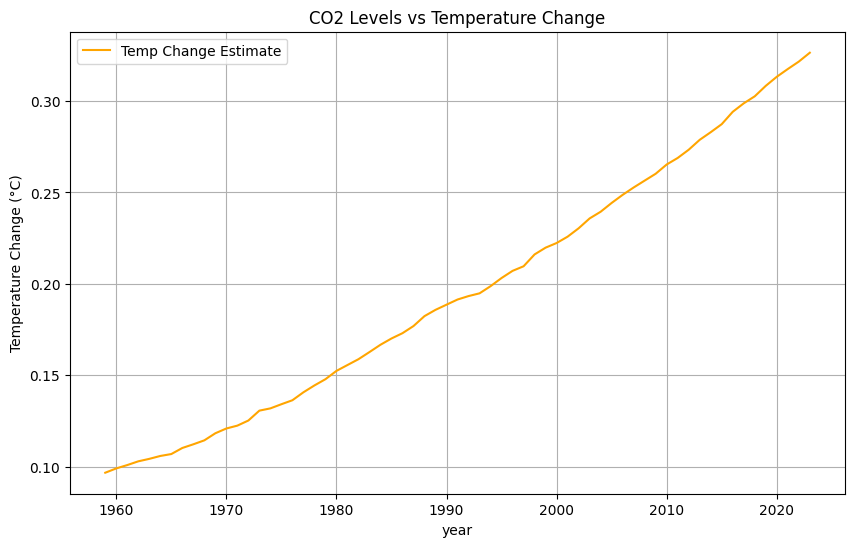

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Set the directory
#Set the directories
path = "C:/Users/aksha/Downloads/Mini_Project_1_Air_Pollution"
os.chdir(path) #Change the directory to that path
# Load the data
file_path = r"co2_annmean_mlo.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Check if 'mean' column exists and proceed
if 'mean' in df.columns:
    # Select relevant columns
    sample_date_data = df['year']
    CO2_levels = df['mean']
    # Filter positiveCO2 levels
    CO2_above_zero =CO2_levels[co2_levels > 0]
    # Constants for calculation
    pre_industrial_co2 = 280  # ppm
    climate_factor = 0.8      # °C per doubling ofCO2

    # Temperature change calculation (logarithmic model)
    temp_variation = climate_factor * np.log(co2_above_zero / pre_industrial_co2)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sample_date_data[:len(temp_variation)], temp_variation, color='orange', label='Temp Change Estimate')
    plt.xlabel('year')
    plt.ylabel('Temperature Change (°C)')
    plt.title('CO2 Levels vs Temperature Change')
    plt.grid(True)
    plt.legend()
    plt.show()





else:
    print("The required 'mean' column is missing. Available columns are:", df.columns)


<h4> 2. Obtain the estimates of $CO_2$ prior to the industrial revolution.  See How the global and latitudinal temperature has changed over time.  State the sources of your data and information </li>

In this analysis, we explore the effects of CO₂ concentrations on climate change by examining historical CO₂ data and projecting future scenarios. We start with the pre-industrial CO₂ concentration, which is set at approximately 280 ppm, corresponding to the year 1760. Our simulation assumes that CO₂ emissions increase by 2% year-over-year from the pre-industrial value. This rate is chosen to reflect potential future trends based on current emission trajectories, acknowledging that emissions could accelerate due to various factors, including industrial activity and population growth. The model begins at an initial temperature of T₀ = 14°C at time t=0, representing the baseline climate state.

_Source: https://scrippsco2.ucsd.edu/data/atmospheric_co2/icecore_merged_products.html_

_Source: https://berkeleyearth.org/data/_

The code calculates average CO₂ levels from the pre-industrial period (up to 1760) and the current period (2000-2023) using the pandas library. It loads data from merged_ice_core_yearly.csv, computes yearly averages for CO₂, and combines the results into a new DataFrame saved as average_co2_combined.csv. Additionally, it loads global temperature data, visualizes both CO₂ and temperature trends over time, and highlights differences between historical and contemporary levels.

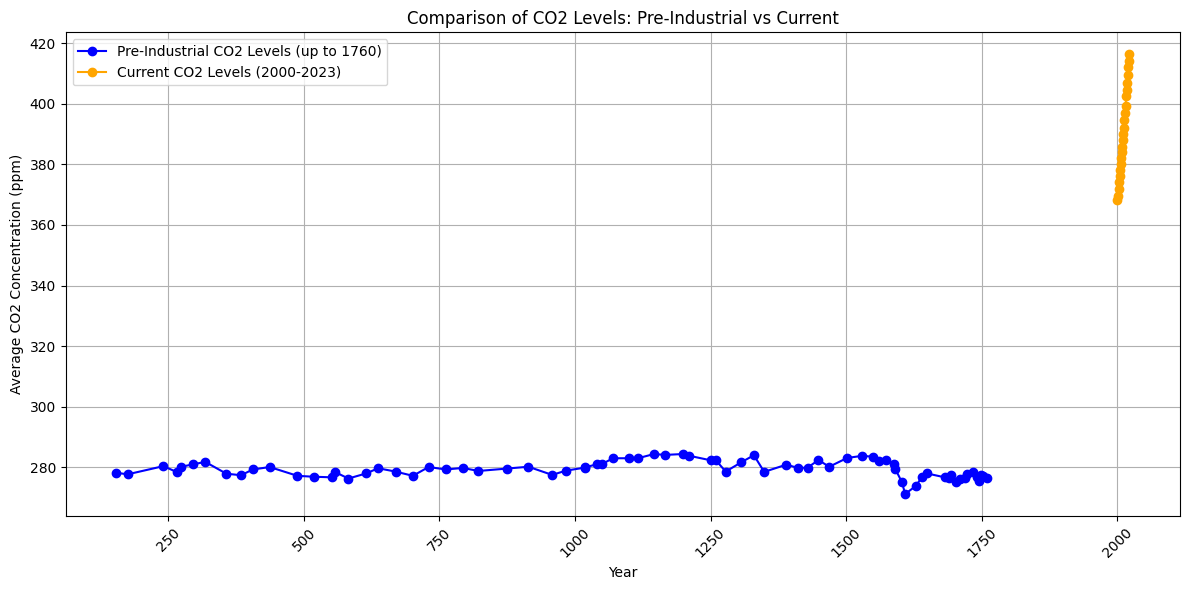

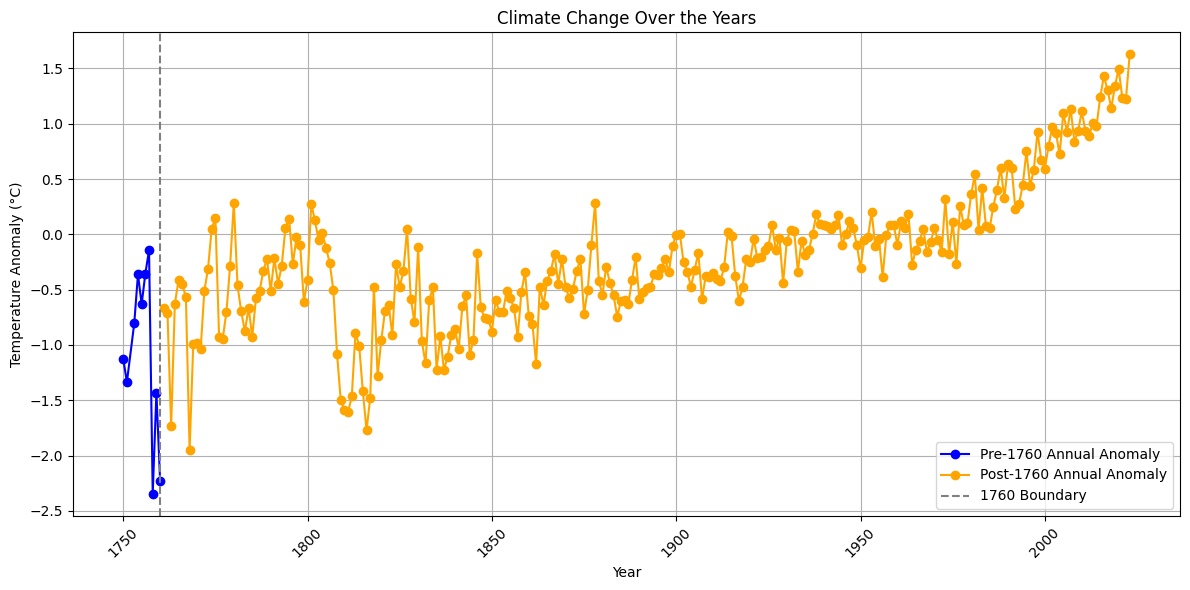

In [57]:
# Load the combined CO2 data
file_path = r"merged_ice_core_yearly.csv"
co2_data = pd.read_csv(file_path)

# Filter for pre-industrial CO2 data (up to and including 1760)
pre_industrial_data = co2_data[co2_data['sample_date'] <= 1760]

# Calculate the average CO2 for each year in the pre-industrial period
average_co2_pre_industrial = pre_industrial_data.groupby('sample_date')['CO2'].mean().reset_index()
average_co2_pre_industrial.columns = ['YEAR', 'AVERAGE_CO2']

# Filter for current CO2 data (for example, from 2000 to 2023)
current_data = co2_data[(co2_data['sample_date'] >= 2000) & (co2_data['sample_date'] <= 2023)]

# Calculate the average CO2 for each year in the current period
average_co2_current = current_data.groupby('sample_date')['CO2'].mean().reset_index()
average_co2_current.columns = ['YEAR', 'AVERAGE_CO2']

# Combine pre-industrial and current CO2 data for comparison
average_co2_combined = pd.concat([average_co2_pre_industrial, average_co2_current], ignore_index=True)

# Save the combined data to a new CSV file (optional)
average_co2_combined.to_csv(r'C:/Users/aksha/Downloads/Mini_Project_1_Air_Pollution/average_co2_combined.csv', index=False)
# Plotting the average CO2 data
plt.figure(figsize=(12, 6))
plt.plot(average_co2_pre_industrial['YEAR'], average_co2_pre_industrial['AVERAGE_CO2'], 
         marker='o', linestyle='-', color='blue', label='Pre-Industrial CO2 Levels (up to 1760)')
plt.plot(average_co2_current['YEAR'], average_co2_current['AVERAGE_CO2'], 
         marker='o', linestyle='-', color='orange', label='Current CO2 Levels (2000-2023)')
plt.title('Comparison of CO2 Levels: Pre-Industrial vs Current')
plt.xlabel('Year')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Load your data (adjust the path to your file)
data_path = 'Global_Temperature.csv'  # Replace with your actual CSV file path

# Load the data
data = pd.read_csv(data_path)


# Ensure the Year column is treated as numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Filter data for pre-1760 and post-1760
pre_1760_data = data[data['Year'] <= 1760]
post_1760_data = data[data['Year'] > 1760]

# Plotting
plt.figure(figsize=(12, 6))

# Plot Pre-1760
plt.plot(pre_1760_data['Year'], pre_1760_data['Annual Anomaly'], 
         marker='o', linestyle='-', color='blue', label='Pre-1760 Annual Anomaly')

# Plot Post-1760
plt.plot(post_1760_data['Year'], post_1760_data['Annual Anomaly'], 
         marker='o', linestyle='-', color='orange', label='Post-1760 Annual Anomaly')

# Adding Titles and Labels
plt.title('Climate Change Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(rotation=45)
plt.axvline(x=1760, color='gray', linestyle='--', label='1760 Boundary')  # Line to show the boundary
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Load CO2 data
averageco2 = pd.read_csv('average_co2_combined.csv')  # Update this path to your CO2 CSV file

# Load temperature data
globaltemperature = pd.read_csv('Global_Temperature.csv')  # Update this path to your temperature CSV file

# Rename columns if necessary
averageco2.rename(columns={'sample_date': 'Year'}, inplace=True)  # Adjust 'sample_date' to your actual CO2 date column name
globaltemperature.rename(columns={'Year': 'Year'}, inplace=True)  # Ensure the year column is named the same


<h4>3. For the current carbon dioxide concentrations estimate the average temperature from Equator to the North Pole.

The code models temperature changes at the equator by calculating incoming and outgoing solar radiation based on CO₂ levels and latitude. It loads CO₂ data from average_co2_combined.csv and defines functions for net radiation, outgoing radiation, and heat transport. Using an ODE solver, it simulates temperature evolution over 100 arbitrary time units and visualizes the results against the average temperature from the equator to the North Pole.

Time: 0.00, Net Inflow: 289.45, Outgoing: 196.17, Heat Transport: 51.31
Time: 0.02, Net Inflow: 289.45, Outgoing: 201.28, Heat Transport: 43.14
Time: 0.02, Net Inflow: 289.45, Outgoing: 200.65, Heat Transport: 44.15
Time: 0.02, Net Inflow: 289.45, Outgoing: 202.48, Heat Transport: 41.22
Time: 0.07, Net Inflow: 289.45, Outgoing: 211.77, Heat Transport: 26.36
------------------------------------------------------------------------------------------------------------------------


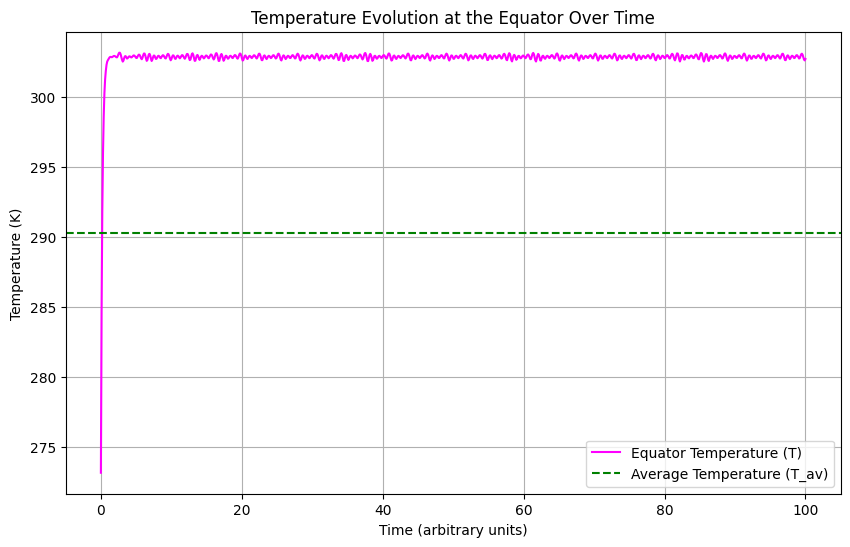

In [64]:
# Load CO2 data
co2_data = pd.read_csv('average_co2_combined.csv')  # Update this path to your CO2 CSV file
P_CO2 = co2_data['AVERAGE_CO2'].iloc[-1] / 1000  # Get the last CO2 value in kPa
# Constants
Q = 343  # Average incoming solar radiation in W/m^2
T_c = 263.15  # Critical temperature at the ice-land boundary in Kelvin
y_c = 0.5  # Critical latitude (0 to 1 scale, 0 = Equator, 1 = North Pole)

# Albedo values
alpha_1 = 0.32  # Albedo in non-ice zone
alpha_2 = 0.62  # Albedo in ice zone

# Function to calculate incoming solar radiation based on latitude
def incoming_solar_radiation(y):
    return Q * (1 - 0.482 * ((3 * y**2 - 1) / 2))

# Albedo function based on latitude
def albedo(y):
    if y > y_c:
        return alpha_2  # Ice zone
    elif y < y_c:
        return alpha_1  # Non-ice zone
    else:
        return 0.47  # Interface zone

# Net incoming radiation calculation
def net_incoming_radiation(y):
    alpha_y = albedo(y)
    Q_L = incoming_solar_radiation(y)
    Q_n = (1 - alpha_y) * Q_L
    return Q_n

# Constants for outgoing radiation calculation
P_CO2_ref = 0.03  # Reference CO2 pressure in kPa (300 ppm)

# Calculate psi
def calculate_psi(P_CO2, P_CO2_ref):
    return np.log(P_CO2 / P_CO2_ref)

# Calculate A(psi)
def A(psi):
    return -326.4 + 9.161 * psi - 3.164 * psi**2 + 0.546 * psi**3

# Calculate B(psi)
def B(psi):
    return 1.953 - 0.04866 * psi + 0.01309 * psi**2 - 0.002577 * psi**3

# Calculate outgoing radiation I
def outgoing_radiation(T, P_CO2, P_CO2_ref):
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    A_value = A(psi_value)
    B_value = B(psi_value)
    return A_value + B_value * T

# Calculate heat transport coefficient C(psi)
def C(psi):
    return 1.6 * B(psi)  # Using the previously defined B(psi)

# Calculate the heat transport term D
def heat_transport(T_av, T_y, P_CO2, P_CO2_ref):
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    C_value = C(psi_value)
    D = C_value * (T_av - T_y)
    return D

# Governing equation
call_counter = 0  # Initialize a counter

def dTdt(t, T, y, T_av):
    global call_counter  # Use the global counter
    
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    alpha_y = albedo(y)
    
    # Incoming solar radiation
    Q_L = incoming_solar_radiation(y)
    
    # Net incoming radiation
    net_inflow = (1 - alpha_y) * Q_L
    
    # Outgoing radiation
    outgoing = outgoing_radiation(T[0], P_CO2, P_CO2_ref)
    
    # Heat transport
    transport = heat_transport(T_av, T[0], P_CO2, P_CO2_ref)

    # Print the calculated values for the first 5 calls
    if call_counter < 5:
        print(f'Time: {t:.2f}, Net Inflow: {net_inflow:.2f}, Outgoing: {outgoing:.2f}, Heat Transport: {transport:.2f}')
        call_counter += 1  # Increment the counter
    
    # Governing equation
    dT_dt = (net_inflow - outgoing + transport)  # R is assumed to be 1 for simplicity
    return [dT_dt]

# Initial condition: temperature at t=0 (equator temperature)
T_initial = 273.15  # Initial temperature at the equator (in Kelvin)
y_equator = 0  # Equator latitude

# Example average temperature (T_av) from Equator to North Pole
T_av = 290.31  # Average temperature from Equator to North Pole

# Time span for the simulation
time_span = (0, 100)  # Time span (in arbitrary units)
time_eval = np.linspace(0, 100, 1000)  # Time points for the result

# Solve the ODE
solution = solve_ivp(dTdt, time_span, [T_initial], args=(y_equator, T_av), t_eval=time_eval)

# Extract the results
temperature_values = solution.y[0]  # Get the temperature over time
time_values = solution.t  # Get the corresponding time values

print("-" * 120)  # Line break

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_values, temperature_values, label="Equator Temperature (T)", color='magenta')
plt.axhline(T_av, color='g', linestyle='--', label="Average Temperature (T_av)")
plt.title('Temperature Evolution at the Equator Over Time')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True)
plt.show()


<h4>4. Explore what happens when $CO_2$ concentrations double from the present value and a new equilibrium is achieved.

The code simulates temperature changes at the equator under initial and doubled CO₂ concentrations. It calculates incoming and outgoing solar radiation, net radiation, and heat transport based on latitude. Using an ODE solver, it models temperature evolution over 500 arbitrary time units for both scenarios. The results are visualized, and final temperatures for each CO₂ level are printed.

Time: 0.00, Net Inflow: 289.45, Outgoing: 203.02, Heat Transport: 52.54
Time: 0.02, Net Inflow: 289.45, Outgoing: 208.25, Heat Transport: 44.18
Time: 0.02, Net Inflow: 289.45, Outgoing: 207.44, Heat Transport: 45.47
Time: 0.02, Net Inflow: 289.45, Outgoing: 209.23, Heat Transport: 42.59
Time: 0.07, Net Inflow: 289.45, Outgoing: 218.37, Heat Transport: 27.98
------------------------------------------------------------------------------------------------------------------------
Final Temperature with Initial CO2 (0.0852 kPa): 301.03 K
Final Temperature with Doubled CO2 (0.1704 kPa): 301.78 K


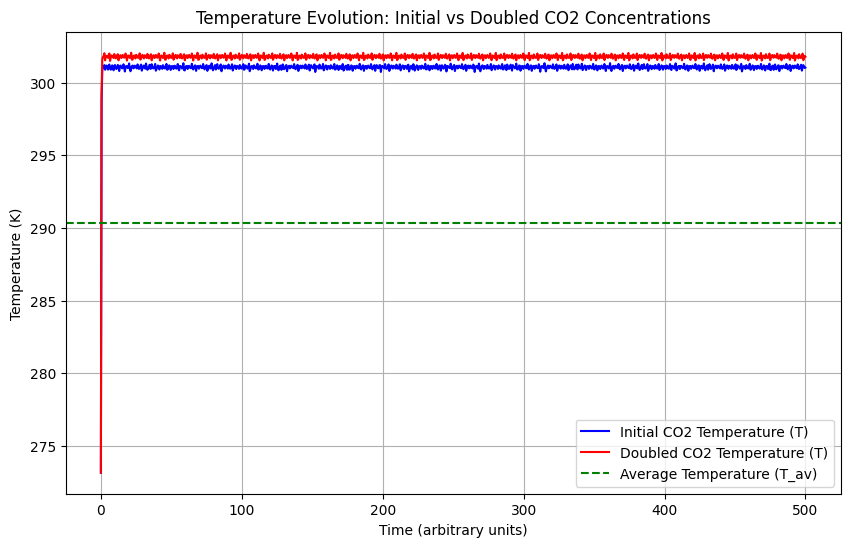

In [65]:
# Constants
Q = 343  # Average incoming solar radiation in W/m^2
T_c = 263.15  # Critical temperature at the ice-land boundary in Kelvin
y_c = 0.5  # Critical latitude (0 to 1 scale, 0 = Equator, 1 = North Pole)

# Albedo values
alpha_1 = 0.32  # Albedo in non-ice zone
alpha_2 = 0.62  # Albedo in ice zone

# Function to calculate incoming solar radiation based on latitude
def incoming_solar_radiation(y):
    return Q * (1 - 0.482 * ((3 * y**2 - 1) / 2))

# Albedo function based on latitude
def albedo(y):
    if y > y_c:
        return alpha_2  # Ice zone
    elif y < y_c:
        return alpha_1  # Non-ice zone
    else:
        return 0.47  # Interface zone

# Constants for outgoing radiation calculation
P_co2_initial = 0.0852  # Current CO2 partial pressure in kPa (420 ppm)
P_co2_doubled = P_co2_initial * 2  # Doubling CO2 pressure
P_co2_ref = 0.03  # Reference CO2 pressure in kPa (300 ppm)

# Calculate psi
def calculate_psi(P_co2, P_co2_ref):
    return np.log(P_co2 / P_co2_ref)

# Calculate coefficients A(psi) and B(psi)
def A(psi):
    return -326.4 + 9.161 * psi - 3.164 * psi**2 + 0.546 * psi**3

def B(psi):
    return 1.953 - 0.04866 * psi + 0.01309 * psi**2 - 0.002577 * psi**3

# Calculate outgoing radiation I
def outgoing_radiation(T, P_co2, P_co2_ref):
    psi_value = calculate_psi(P_co2, P_co2_ref)
    return A(psi_value) + B(psi_value) * T

# Calculate heat transport coefficient C(psi)
def C(psi):
    return 1.6 * B(psi)  # Using the previously defined B(psi)

# Calculate the heat transport term D
def heat_transport(T_av, T_y, P_co2, P_co2_ref):
    psi_value = calculate_psi(P_co2, P_co2_ref)
    C_value = C(psi_value)
    return C_value * (T_av - T_y)

# Governing equation for temperature change
call_counter = 0  # Initialize a counter

def dTdt(t, T, y, T_av, P_co2):
    global call_counter  # Use the global counter
    
    # Calculate parameters
    psi_value = calculate_psi(P_co2, P_co2_ref)
    alpha_y = albedo(y)
    Q_L = incoming_solar_radiation(y)  # Incoming solar radiation
    net_inflow = (1 - alpha_y) * Q_L  # Net incoming radiation
    outgoing = outgoing_radiation(T[0], P_co2, P_co2_ref)  # Outgoing radiation
    transport = heat_transport(T_av, T[0], P_co2, P_co2_ref)  # Heat transport

    # Print the calculated values for the first 5 calls
    if call_counter < 5:
        print(f'Time: {t:.2f}, Net Inflow: {net_inflow:.2f}, Outgoing: {outgoing:.2f}, Heat Transport: {transport:.2f}')
        call_counter += 1  # Increment the counter
    
    # Governing equation for temperature change
    dT_dt = (net_inflow - outgoing + transport)  # R is assumed to be 1 for simplicity
    return [dT_dt]

# Initial condition: temperature at t=0 (equator temperature)
T_initial = 273.15  # Initial temperature at the equator (in Kelvin)
y_equator = 0  # Equator latitude

# Average temperature (T_av)
T_av = 290.31  # Average temperature from Equator to North Pole

# Time span for the simulation
time_span = (0, 500)  # Time span (in arbitrary units)
time_eval = np.linspace(0, 500, 1000)  # Time points for the result

# Solve the ODE for the initial CO2 concentration
solution_initial = solve_ivp(dTdt, time_span, [T_initial], args=(y_equator, T_av, P_co2_initial), t_eval=time_eval)

# Solve the ODE for the doubled CO2 concentration
solution_doubled = solve_ivp(dTdt, time_span, [T_initial], args=(y_equator, T_av, P_co2_doubled), t_eval=time_eval)

# Extract the results
temperature_values_initial = solution_initial.y[0]  # Get the temperature over time for initial CO2
temperature_values_doubled = solution_doubled.y[0]  # Get the temperature over time for doubled CO2
time_values = solution_initial.t  # Get the corresponding time values

# Print equilibrium results
final_temp_initial = temperature_values_initial[-1]
final_temp_doubled = temperature_values_doubled[-1]
print("-" * 120)  # Line break
print(f'Final Temperature with Initial CO2 ({P_co2_initial} kPa): {final_temp_initial:.2f} K')
print(f'Final Temperature with Doubled CO2 ({P_co2_doubled} kPa): {final_temp_doubled:.2f} K')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_values, temperature_values_initial, label="Initial CO2 Temperature (T)", color='b')
plt.plot(time_values, temperature_values_doubled, label="Doubled CO2 Temperature (T)", color='r')
plt.title('Temperature Evolution: Initial vs Doubled CO2 Concentrations')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Temperature (K)')
plt.axhline(T_av, color='g', linestyle='--', label="Average Temperature (T_av)")
plt.legend()
plt.grid(True)
plt.show()


Observation : When CO₂ levels are stable, the Earth keeps a good balance of energy with enough outgoing radiation and heat movement. But when CO₂ concentrations double, the greenhouse effect gets stronger, trapping more heat in the atmosphere and limiting the outgoing radiation. This makes heat movement less efficient, leading to higher global temperatures.

<h4>5. Reflect the role of simple models such as these on understanding climate change



1. **Basic Understanding**: They provide a clear way to understand complex climate systems by focusing on key factors like solar energy, surface reflectivity (albedo), and greenhouse gases.

2. **Easier to Grasp**: These models make climate science more accessible to everyone, including students and policymakers, by breaking down complex ideas.

3. **Testing Ideas**: Simple models allow scientists to test theories about how different factors affect the climate, such as the impact of increased CO₂ levels on temperatures.

4. **Educational Use**: They are valuable teaching tools that help learners understand the basics of climate systems and the effects of human activities.

5. **Building Block for Complex Models**: Simple models can be improved and expanded as we learn more about the climate, serving as a foundation for more advanced models.

6. **Informing Policies**: Insights from these models help policymakers make better decisions about climate action and regulations.

7. **Visual Communication**: Simple models often produce clear graphs and visualizations, making it easier to explain trends and outcomes to the public.

8. **Exploring Scenarios**: They allow exploration of different scenarios, such as the effects of reducing emissions, helping stakeholders consideore detailed models.
